## FULL WORKING BAYESIAN UPDATING ANIMATION

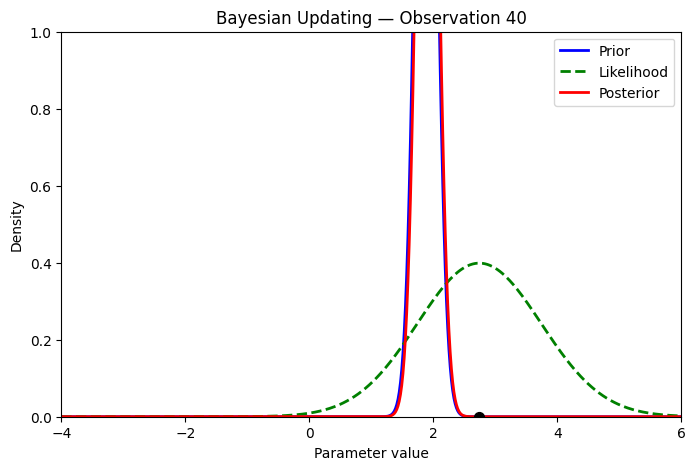

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from scipy.stats import norm

# ------------------------------------------------
# Output folder
# ------------------------------------------------
os.makedirs("gifs", exist_ok=True)

# ------------------------------------------------
# Generate observations
# ------------------------------------------------
np.random.seed(1)
true_mu = 2.0
true_sigma = 1.0
data = np.random.normal(true_mu, true_sigma, 40)

# ------------------------------------------------
# Prior (Normal-Normal conjugate)
# ------------------------------------------------
mu_prior = 0.0
sigma_prior = 3.0

likelihood_sigma = 1.0  # assumed known

# Grid for plotting
x = np.linspace(-4, 6, 500)

# ------------------------------------------------
# Plot setup
# ------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 5))

prior_line, = ax.plot([], [], "b", lw=2, label="Prior")
likelihood_line, = ax.plot([], [], "g--", lw=2, label="Likelihood")
posterior_line, = ax.plot([], [], "r", lw=2, label="Posterior")
data_point = ax.scatter([], [], color="black", s=50, zorder=5)

ax.set_xlim(-4, 6)
ax.set_ylim(0, 1)
ax.set_xlabel("Parameter value")
ax.set_ylabel("Density")
ax.set_title("Bayesian Updating (Normal–Normal)")
ax.legend()

# ------------------------------------------------
# Bayesian update functions
# ------------------------------------------------
def update_posterior(mu0, sigma0, x_obs, sigma):
    precision_prior = 1 / sigma0**2
    precision_lik = 1 / sigma**2

    mu_post = (mu0 * precision_prior + x_obs * precision_lik) / (precision_prior + precision_lik)
    sigma_post = np.sqrt(1 / (precision_prior + precision_lik))

    return mu_post, sigma_post

# ------------------------------------------------
# Animation
# ------------------------------------------------
writer = PillowWriter(fps=2)

with writer.saving(fig, "gifs/bayesian_updating.gif", dpi=120):

    mu, sigma = mu_prior, sigma_prior

    for i, obs in enumerate(data):

        # Prior
        prior_pdf = norm.pdf(x, mu, sigma)

        # Likelihood (centered on observation)
        likelihood_pdf = norm.pdf(x, obs, likelihood_sigma)

        # Posterior
        mu_new, sigma_new = update_posterior(mu, sigma, obs, likelihood_sigma)
        posterior_pdf = norm.pdf(x, mu_new, sigma_new)

        # Update plots
        prior_line.set_data(x, prior_pdf)
        likelihood_line.set_data(x, likelihood_pdf)
        posterior_line.set_data(x, posterior_pdf)

        data_point.set_offsets([[obs, 0]])

        ax.set_title(f"Bayesian Updating — Observation {i+1}")

        writer.grab_frame()

        # Move posterior → next prior
        mu, sigma = mu_new, sigma_new

plt.show()
